# Теоретическая часть


### 1. <br> Смоделируем функции OR, AND, NOT(X1 AND X2) с помощью нейронов с бинарной пороговой функцией активации.

**a)** OR

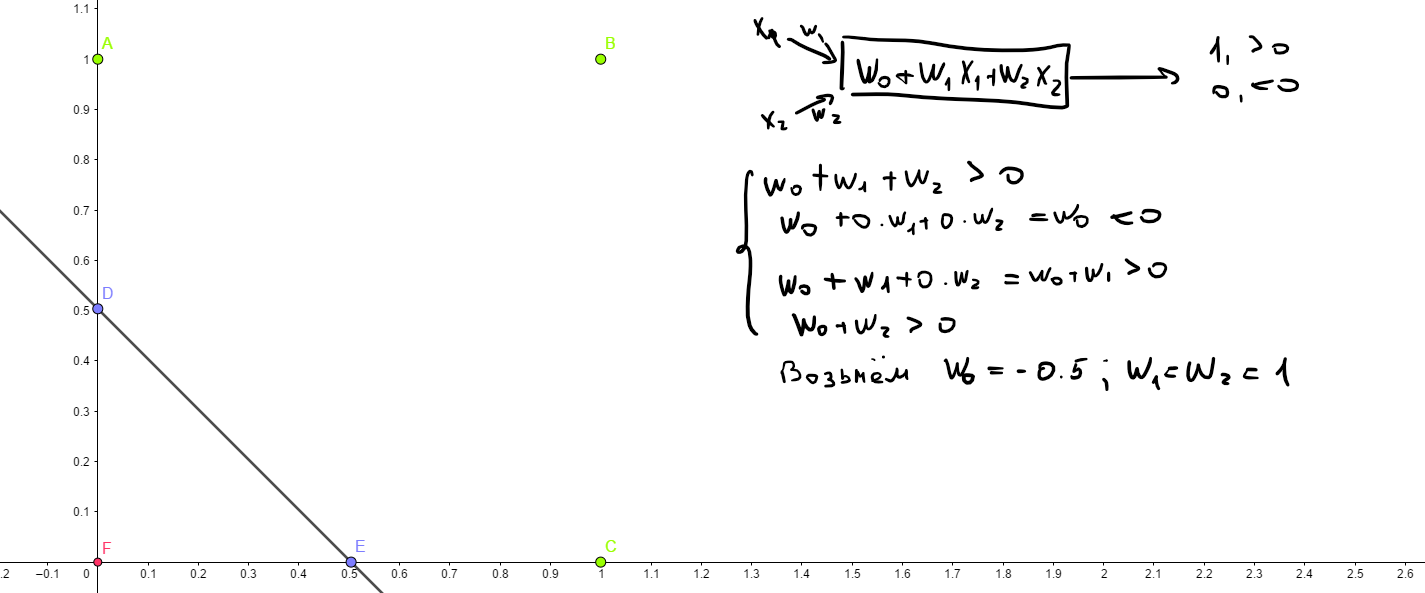

**b)** AND

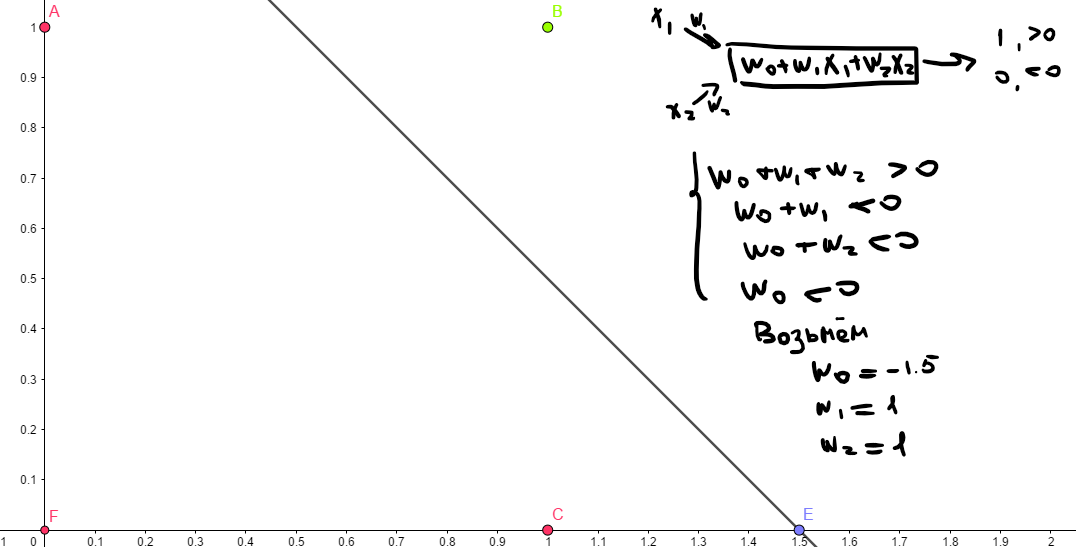

**c)** NOT(X1 AND X2)

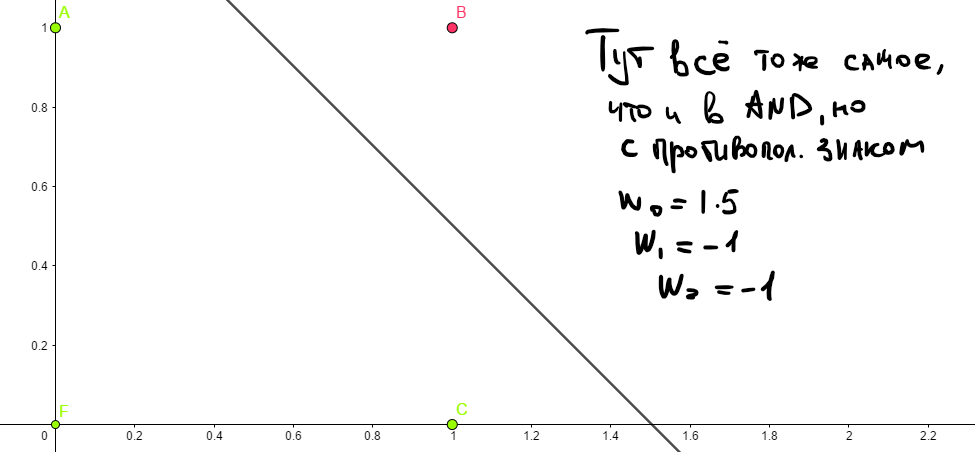

Однослойная нейросеть с пороговыми активациями, которая имитирует XOR

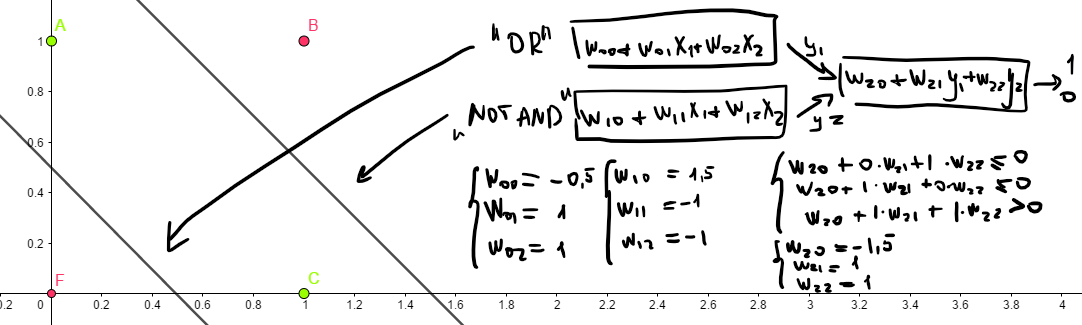

### 2. Посчитайте производную сигмоиды σ(z)

$$\sigma(x) = \frac{1}{1 + e^{-x}} = (1 + e^{-x})^{-1}$$
$$\sigma'(x) = -(1 + e^{-x})^{-2} * e^{-x} * (-1) = (1 + e^{-x})^{-2} * e^{-x} = (1 + e^{-x})^{-2} * (e^{-x} + 1) - (1 + e^{-x})^{-2} = \sigma^{-1}(x)*\sigma^{2}(x) - \sigma^{2}(x) = \sigma(x)*(1 - \sigma(x))$$

### 3. Покажите, что для сигмоиды σ(z) справедливо следующее выражение:

$$σ(−z) = 1 − σ(z)$$

$$\sigma(z) + \sigma(-z) = \frac{1}{1 + e^z} + \frac{1}{1 + e^{-z}} = \frac{1 + e^{-z} + 1 + e^{z}}{(1 + e^z)(1 + e^{-z})} = \frac{(1 + e^z)(1 + e^{-z})}{(1 + e^z)(1 + e^{-z})} = 1$$

### 4. Выпишите формулу гипотезы $h_w(x)$ для логистической регрессии.


$$\hat{y} = h_w(x) = \sigma(z) = \sigma([1;x]^Tw) = \sigma(w_0 + \sum_{i=1}^m w_i*x_i)$$


### 5.Нарисуйте графики значения оценочной функции бинарная кросс-энтропия для одного примера из положительного и одного примера из отрицательного класса

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

$$bce(y, \hat{y}) = −y log \hat{y} − (1 − y) log(1 − \hat{y})$$

**а)** Положительный класс **($y = 1$)**
$$bce(\hat{y}) = -log(\hat{y})$$

In [ ]:
rng = np.arange(0.000001, 1.0, 0.01)
plt.plot(rng, -np.log(rng), 'r--')

**а)** Отрицательный класс **($y = 0$)**
$$bce(\hat{y}) = -log(1 - \hat{y})$$

In [ ]:
rng = np.arange(0.000000, 1.0 - 0.000001, 0.01)
plt.plot(rng, -np.log(1 - rng), 'r--')

При инициализации $w_0 = ... = w_m = 0$, тогда $z = [1; x]^T w = 0 => \hat{y} = 0.5$
$$bce(y, 0.5) = -y*log(0.5) - log(0.5) + y*log(0.5) = -log(0.5)$$ 

### 6. Выпишите функцию правдоподобия. С помощью принципа максимального правдоподобия обоснуйте вид оценочной функции бинарная кросс-энтропия

$$L(h_w(x)|X) = \prod_{i=1}^{n}p(y_i) = \prod_{i=1}^{n}\left[\mathbb{1}[y_i = 1] * h_w(x) + \mathbb{1}[y_i = 0] * (1 - h_w(x))\right] = \prod_{i=1}^{n}h_w(x)^y*(1 - h_w(x))^{1 - y}$$

По принципу максимального правдоподобия, наилучшая оценка параметра $h_w(x)$ достигается при наибольшем значении функции правдоподобия.<br>
Вместо этого будем максимизировать логарифм функции правдоподобия, т.к. логарифм монотонная функция.

$$log(L) = \sum_{i=1}^n y*log(h_w(x)) + (1 - y)*log((1 - h_w(x)))$$

Так как минимум искать проще, чем максимум, то будет минимизировать $-log(L)$
$$-log(L) = \sum_{i=1}^n -y*log(h_w(x)) - (1 - y)*log((1 - h_w(x)))$$
Под знаком суммы мы можем увидеть бинарную кросс-энтропию. Для выборки будем считать сумму **bce** по всем примерам.

### 7. Посчитайте градиент оценочной функции $∇wL(w, x{1}, . . . , x{N})$ для бинарной (двухклассовой) логистической регрессии

$$L(w, x{1}, . . . , x{N}) = −\frac{1}{N}\sum_{i=1}^{N}(y_{i} log h_w(x_{i}) + (1 − y_{i}) log(1 − h_w(x_{i}))) + \alpha \sum_{j=1}^{M} w_j^2$$


Выпишем производную функции потерь по одному весу.<br>

$$\frac{\partial L(w, X)}{\partial w_j} = 
-\frac{\partial \frac{1}{N}\left[\sum_i y_i \log h_w(x_{i}) + ( 1 - y_i) \log (1 - h_w(x_{i})) \right]}{\partial h_w(x_{i})} * \frac{\partial h_w(x_{i})}{\partial (w \cdot x_i)} * \frac{\partial (w \cdot x_i)}{\partial w_j}  + \alpha \frac{\partial \sum_{j=1}^{M} w_j^2}{\partial w_j} =$$
$$\frac{1}{N} \left[ \sum_{i=1}^{N}\frac{h_w(x_{i}) - y_i}{h_w(x_{i})*(1 - h_w(x_{i}))} * h_w(x_{i}) * (1 - h_w(x_{i})) * x_{ij} \right] + 2\alpha * w_j = $$
$$\frac{1}{N}  \sum_{i=1}^{N}\left[(h_w(x_{i}) - y_i)*x_{ij}\right] + 2\alpha * w_j$$
Теперь выпишем градиент.
$$\nabla_w L(w, X) =  \frac{1}{N}  \sum_{i=1}^{N}\left[(h_w(x_{i}) - y_i)*x_{i}\right] + 2\alpha * w$$

### 8. Запишите формулу для обновления вектора параметров w при обучении методом градиентного спуска.

$$ w_{new} = w_{old} - \gamma*\nabla_w L(w, X)$$

### 9. Докажите, что оценочная функция бинарная кросс-энтропия для бинарной логистической регрессии имеет единственный минимум в пространстве весов.


$$bce(y, \hat{y}) = −y log \hat{y} − (1 − y) log(1 − \hat{y})$$
Пусть в нашей выборке $a$ примеров класса $0$ и $b$ примеров класса 1, тогда<br>
$$-\frac{1}{a+b}\sum_{i=1}^{a+b}y_i*log(\hat{y}) + (1 - y_i)*log(1 - \hat{y})=$$ 

$$=-\frac{b}{a+b}*log(\hat{y}) -\frac{a}{a+b}*log(1 - \hat{y})$$
Производная от этого выражения равна,
$$\frac{-b(1 - \hat{y}) + a*\hat{y}}{(a+b)(1 - \hat{y})\hat{y}} = \frac{-b + \hat{y}*(a+b)}{(a+b)(1 - \hat{y})\hat{y}}$$
И тогда $\hat{y} = \frac{b}{a+b}$ - единственный минимум оценочной функции.

### 10. Покажите, что минимизация оценочной функции бинарная кросс-энтропия для логистической регрессии эквивалентна минимизации следующей функции: $softplus(−t w^T x)$


Рассмотрим бинарную кросс-энтропию
$$L_1(w) = \begin{cases} -log(\sigma(w^Tx)), & \mbox{if } \mbox{y = 1} \\ -log(1 - \sigma(w^Tx)), & \mbox{if } \mbox{y = 0} \end{cases}$$
$$\frac{\partial L_1(w)}{\partial w} = \begin{cases} (\sigma(w^Tx) - 1) * x, & \mbox{if } \mbox{y = 1} \\ \sigma(w^Tx)*x, & \mbox{if } \mbox{y = 0} \end{cases}$$

Теперь посмотрим на $L_2(w) = softplus(−t w^T x)$

$$\frac{\partial L_2(w)}{\partial w} = \frac{1}{1 + e^{-t w^T x}} * e^{-t w^T x} * \frac{\partial(-t w^T x)}{\partial w}$$<br>
$$= \sigma(-t w^T x) * (-t x) 
= \begin{cases} \sigma(-w^Tx)*(-x), & \mbox{if } \mbox{t = 1} \\ \sigma(w^Tx) * x, & \mbox{if } \mbox{t = -1} \end{cases} 
= \begin{cases} (\sigma(w^Tx) - 1) * x, & \mbox{if } \mbox{t = 1} \\ \sigma(w^Tx)*x, & \mbox{if } \mbox{t = -1} \end{cases}$$

Т.к. у этих функций одинаковые производные по w, то и мимимума они будут достигать при одних и тех же значениях.

# Практическая часть


In [ ]:
import pandas as pd
import re
from collections import defaultdict
import sys
import numpy as np
from math import log
from scipy.sparse import csr_matrix, dok_matrix
import string
import matplotlib.pyplot as plt
from copy import deepcopy

### A

In [ ]:
def preprocessing(text):
    text = text.lower()
    remove_tags = re.compile(r'<.*?>')
    text = re.sub(remove_tags, '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join(sym if (sym.isalnum() or sym in (" ", "'")) else f" {sym} " for sym in text)
    return text

In [ ]:
def tokenize_dataset(dataset, stem=0):
    """
        arg: list of texts
        return: list of tokenized texts
    """
    stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', \
    'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with',
     'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'could','couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
    tokenizer = re.compile(r"-?\d*[.,]?\d+|[?'\w]+|\S", re.MULTILINE | re.IGNORECASE)
    tokenized_dataset = list(map(lambda doc: tokenizer.findall(doc), dataset))
    if stem == 0:
        return [[token for token in text if token not in stop_words] for text in tokenized_dataset]
    stem_dataset = [[token[:stem] for token in text if token not in stop_words] for text in tokenized_dataset]
    return stem_dataset

In [ ]:
train_texts_path = "./filimdb_evaluation/FILIMDB/train.texts"
train_labels_path = "./filimdb_evaluation/FILIMDB/train.labels"

with open(train_texts_path, 'r', encoding='utf-8',) as inp:
    train_texts = list(map(str.strip, inp.readlines()))
with open(train_labels_path, 'r', encoding='utf-8',) as inp:
    train_labels = list(map(str.strip, inp.readlines()))
    

proc_train = list(map(preprocessing, train_texts))
token_train = tokenize_dataset(proc_train)

y_train = np.array([int(lab == 'pos') for lab in train_labels])

In [ ]:
def gen_w2ind(tokenized_texts, bigrams=False, trigrams=False):
    w2ind = defaultdict(int)
    ind2w = {}
    free_ind = 0
    for text in tokenized_texts:
        tokens = text[:]
        if bigrams:
            tokens += list(zip(text[:-1], text[1:]))
        if trigrams:
            tokens += list(zip(text[:-2], text[1:-1], text[2:]))
        for token in tokens:
            if token not in w2ind:
                w2ind[token] = free_ind
                ind2w[free_ind] = token
                free_ind += 1
    return w2ind, ind2w

w2ind_simple, ind2w_simple = gen_w2ind(token_train)
print(len(w2ind_simple))


### B

In [ ]:
def vectorize(tokenized_texts,  w2ind, bigrams=False, trigrams=False, intercept = True):
    
    X = dok_matrix((len(tokenized_texts), len(w2ind) + intercept), dtype=np.float32)
    print("test:", X.shape)
    for ind, text in enumerate(tokenized_texts):
        tokens = text[:]
        if bigrams:
            tokens += list(zip(text[:-1], text[1:]))
        if trigrams:
            tokens += list(zip(text[:-2], text[1:-1], text[2:]))
        for token in tokens:
            if token in w2ind:
                token_ind = w2ind[token]
                if intercept:
                    token_ind += 1
                X[ind, token_ind] += 1
        if intercept:
            X[ind, 0] = 1
    X = X.tocsr()
    return X
  
X_train = vectorize(token_train, w2ind_simple)
print(X_train.data.nbytes + X_train.indptr.nbytes + X_train.indices.nbytes)
print(X_train.shape)

Это примерно 12 МБ.
Если бы мы использовали dense матрицу, то она бы занимала вот столько байт

In [ ]:
len(token_train) * len(w2ind_simple) * 4

Это примерно 4.5 ГБ. В память конечно бы поместилось, но матрица такого размера не создатся.

### C

При вычислении сигмоиды от очень больших значений(или от очень маленьких) мы можем получить 1 (или 0) соотв.<br>
Тогда при подсчёте лосс-функции мы можем получить $log(0)$ и поймать ошибку.<br>
Чтобы такого не происходило отступим с обоих сторон величину равную погрешости типа данных(**float32**). <br>
Теперь нулю будет сложнее достать нас.

In [ ]:
def sigmoid(x):
    np.clip(x, -100, 100)
    sig = 1 / (1 + np.exp(-x))
    sig = np.minimum(sig, 1.0 - np.finfo(np.float32).eps)
    sig = np.maximum(sig, 0.0 + np.finfo(np.float32).eps)
    return sig

print(sigmoid(0))
print(sigmoid(np.zeros(5)))
print(sigmoid(np.zeros((5, 5))))

### D

In [ ]:
def init_weights(num, intercept=False):
    len = num + int(intercept)
    return np.zeros(len)


In [ ]:
print(init_weights(5))
print(init_weights(5, intercept=True))

### E

In [ ]:
%time
def loss_slow(X_train, y_train, weights, alpha):
    loss = 0.0
    acc = 0.0
    for vec, lab in zip(X_train, y_train):
        h = vec.dot(weights)[0]
        y_pred = sigmoid(h)
        loss += (-lab * np.log(y_pred) - (1-lab) * np.log(1 - y_pred))
        pred_lab = int(y_pred > 0.5)
        acc += int(pred_lab == lab)
    
    loss /= X_train.shape[0] 
    acc /= X_train.shape[0]
    loss += alpha * (weights**2).mean()
    return loss, acc

weights = init_weights(X_train.shape[1])
loss_slow(X_train, y_train, weights, alpha=0.1)

In [ ]:
%time
def loss_fast(X_train, y_train, weights, alpha):
    y_pred = sigmoid(X_train.dot(weights))
    loss = (-y_train * np.log(y_pred) - (1 - y_train) * np.log(1 - y_pred)).mean()
    y_lab = (y_pred > 0.5).astype(np.int32)
    acc = (y_lab == y_train).sum() / y_lab.shape[0]
    loss += alpha * (weights**2).mean()
    return loss, acc

weights = init_weights(X_train.shape[1])
loss_fast(X_train, y_train, weights, alpha=0.1)

По скорости разница есть, хоть она и не сильно заметна на текущих данных.

Теперь посчитаем, что должно было получиться в теории.

Т.к все веса нулевые, то скалярные произведения равны 0. Тогда $h_w(z) = \sigma(0) = 0.5$ <br>
$$L(w, x{1}, . . . , x{N}) = −\frac{1}{N}\sum_{i=1}^{N}(y_{i} log h_w(x_{i}) + (1 − y_{i}) log(1 − h_w(x_{i}))) + \alpha \sum_{j=1}^{M} w_j^2$$
$$L(w, x{1}, . . . , x{N}) = −\frac{1}{N}\sum_{i=1}^{N}log(0.5) = -log(0.5) = 0.6931471805599453$$ <br>
Получилось то, что нужно. Разность результатов в 10^-7 можно объяснить погрешностью в вычислениях numpy.

### F

In [ ]:
def loss_grad(X_train, y_train, weights, alpha, intercept=False):
    y_pred = sigmoid(X_train.dot(weights))
    loss = (-y_train * np.log(y_pred) - (1 - y_train) * np.log(1 - y_pred)).mean()
    loss += alpha * (weights**2).mean()
    
    y_lab = (y_pred > 0.5).astype(np.int32)
    acc = (y_lab == y_train).sum() / y_lab.shape[0]
    
    grad = X_train.T.dot(y_pred - y_train) / y_train.shape[0]
    if intercept:
        grad += 2 * alpha * np.insert(weights, 0, 0, axis=0)
    else:
        grad += 2 * alpha * weights
    return loss, acc, grad
    
weights = init_weights(X_train.shape[1])
loss, acc, grad = loss_grad(X_train, y_train, weights, alpha=0.1)
print(loss, acc, grad)

### G 

In [ ]:
def update_weights(old_w, grad, lr):
    return old_w - lr * grad

In [ ]:
def batch_generator(X, y, shuffle=True, batch_size=2):
    """
    Генератор новых батчей для обучения
    """
    
    X_all = X
    y_all = y
    indices = np.arange(X_all.shape[0])
    if shuffle:
        np.random.shuffle(indices)
    for i in range(0, X_all.shape[0], batch_size):
        X_batch = X_all[indices[i : i + batch_size]]
        y_batch = y_all[indices[i : i + batch_size]]
        yield (X_batch, y_batch)

In [ ]:
def fit(X_train, y_train, w, lr, num_epoch, l2reg):
    
    cur_w = w
    train_info = ([], [], []) # ep, loss, acc
    for cur_ep in range(num_epoch):
        if cur_ep % 1 == 0:
            loss, acc = loss_fast(X_train, y_train, cur_w, l2reg)
            train_info[0].append(cur_ep); train_info[1].append(loss); train_info[2].append(acc)
            
        my_batch_generator = batch_generator(X_train, y_train, shuffle=True, batch_size=128)
        for X_batch, y_batch in my_batch_generator:
            loss, acc, grad = loss_grad(X_batch, y_batch, cur_w, l2reg)
            cur_w = update_weights(cur_w, grad, lr)
        
    return cur_w, train_info

In [ ]:
def predict(X_train, w, treshhold=0.5):
    y_pred = (X_train.dot(w) > treshhold).astype(np.int32)
    return y_pred

In [ ]:
def accuracy(y_true, y_pred):
    return (y_true == y_pred).sum() / y_true.shape[0]

In [ ]:
w = init_weights(X_train.shape[1])
new_w, info = fit(X_train, y_train, w, lr=0.01, num_epoch=50, l2reg=0.001)
y_pred = predict(X_train, new_w)
print("Accuracy = ", accuracy(y_train, y_pred))

In [ ]:
def show_info(info, title="Train"):
    fig = plt.figure(figsize=(15, 7))
    ax_acc = fig.add_subplot(221)
    ax_acc.plot(info[0], info[2], 'r--')
    ax_acc.title.set_text(title + ' ' + "accuracy")
    ax_loss = fig.add_subplot(222)
    ax_loss.plot(info[0], info[1], 'r--')
    ax_loss.title.set_text(title + ' ' +  "loss")
    plt.show()

show_info(info)

### H
Проверяем, что классификатор может запомнить 1000 элементов.

In [ ]:
w_small = init_weights(X_train.shape[1])
X_small = X_train[:1000]
y_small = y_train[:1000]

new_w, info = fit(X_small, y_small, w_small, lr=0.1, num_epoch=300, l2reg=0)
y_pred = predict(X_small, new_w)
print("Accuracy = ", accuracy(y_small, y_pred))
show_info(info)

### I
Запускаем регрессию с $lr = 1e-3, \alpha = 1e-5$ на train и dev выборках.

In [ ]:
dev_texts_path = "./filimdb_evaluation/FILIMDB/dev.texts"
dev_labels_path = "./filimdb_evaluation/FILIMDB/dev.labels"

with open(dev_texts_path, 'r', encoding='utf-8',) as inp:
    dev_texts = list(map(str.strip, inp.readlines()))
with open(dev_labels_path, 'r', encoding='utf-8',) as inp:
    dev_labels = list(map(str.strip, inp.readlines()))
    

proc_dev = list(map(preprocessing, dev_texts))
token_dev = tokenize_dataset(proc_dev)

y_dev = np.array([int(lab == 'pos') for lab in dev_labels])

X_dev = vectorize(token_dev, w2ind_simple)

In [ ]:
def fit(train_dataset, w, lr=1e-3, num_epoch=50, l2reg=1e-5, dev_dataset=None):
    
    cur_w = w
    train_info = ([], [], []) # ep, loss, acc
    dev_info = None
    X_train, y_train = train_dataset
    if dev_dataset:
        X_dev, y_dev = dev_dataset
        dev_info = ([], [], [])
    for cur_ep in range(num_epoch):
        if cur_ep % 1 == 0:
            loss, acc = loss_fast(X_train, y_train, cur_w, l2reg)
            train_info[0].append(cur_ep); train_info[1].append(loss); train_info[2].append(acc)
            if dev_dataset:
                loss, acc = loss_fast(X_dev, y_dev, cur_w, l2reg)
                dev_info[0].append(cur_ep); dev_info[1].append(loss); dev_info[2].append(acc)
            
        my_batch_generator = batch_generator(X_train, y_train, shuffle=True, batch_size=256)
        for X_batch, y_batch in my_batch_generator:
            loss, acc, grad = loss_grad(X_batch, y_batch, cur_w, l2reg)
            cur_w = update_weights(cur_w, grad, lr)
        
    return cur_w, train_info, dev_info

In [ ]:
train_dataset = (X_train, y_train)
dev_dataset = (X_dev, y_dev)
w = init_weights(X_train.shape[1])

new_w, train_info, dev_info = fit(train_dataset, w, num_epoch=5000, dev_dataset=dev_dataset)
y_train_pred = predict(X_train, new_w)
print("Train accuracy = ", accuracy(y_train, y_train_pred))
show_info(train_info)
y_dev_pred = predict(X_dev, new_w)
print("Dev accuracy = ", accuracy(y_dev, y_dev_pred))
show_info(dev_info, title="Dev")

При $lr=10^{-3}$ и $\alpha=10^{-5}$ модель обучается очень медленно, сходимость начинает достигаться примерно на 5000 эпох.

### J

Попробуем различные значения learning rate, и посмотрим, что будет получаться.

Learning rate = 0.1 <br>
На графиках ниже можно увидеть, что на тренировочных данных модель сходится примерно за 70 эпох и дальше переобучается.

In [ ]:
new_w, train_info, dev_info = fit(train_dataset, w, lr=0.1, num_epoch=300, dev_dataset=dev_dataset)
y_train_pred = predict(X_train, new_w)
print("Train accuracy = ", accuracy(y_train, y_train_pred))
show_info(train_info)
y_dev_pred = predict(X_dev, new_w)
print("Dev accuracy = ", accuracy(y_dev, y_dev_pred))
show_info(dev_info, title="Dev")

Learning rate = 0.01 <br>
При таком lr модель обучается примерно 700 эпох, дальше переобучается.

In [ ]:
new_w, train_info, dev_info = fit(train_dataset, w, lr=0.01, num_epoch=1500, dev_dataset=dev_dataset)
y_train_pred = predict(X_train, new_w)
print("Train accuracy = ", accuracy(y_train, y_train_pred))
show_info(train_info)
y_dev_pred = predict(X_dev, new_w)
print("Dev accuracy = ", accuracy(y_dev, y_dev_pred))
show_info(dev_info, title="Dev")

Learning rate = 0.05 <br>
При таком lr модель обучается примерно 250 эпох, дальше переобучается.

In [ ]:
new_w, train_info, dev_info = fit(train_dataset, w, lr=0.05, num_epoch=300, dev_dataset=dev_dataset)
y_train_pred = predict(X_train, new_w)
print("Train accuracy = ", accuracy(y_train, y_train_pred))
show_info(train_info)
y_dev_pred = predict(X_dev, new_w)
print("Dev accuracy = ", accuracy(y_dev, y_dev_pred))
show_info(dev_info, title="Dev")

Learning rate = 0.3 <br>
При таком lr модель обучается примерно 15 эпох, дальше переобучается.

In [ ]:
new_w, train_info, dev_info = fit(train_dataset, w, lr=0.3, num_epoch=300, dev_dataset=dev_dataset)
y_train_pred = predict(X_train, new_w)
print("Train accuracy = ", accuracy(y_train, y_train_pred))
show_info(train_info)
y_dev_pred = predict(X_dev, new_w)
print("Dev accuracy = ", accuracy(y_dev, y_dev_pred))
show_info(dev_info, title="Dev")

Из этих графиков можно сделать вывод, что при увеличении **learning rate** обучение ускоряется, но быстро происходит переобучение и можно пройти мимо оптимального минимума.

### K

Попробуем подобрать коэффициент регуляризации получше и посмотрим, как он влияет на обучение. 

**1.** $alpha = 10^{-3}, lr = 0.1$

In [ ]:
new_w, train_info, dev_info = fit(train_dataset, w, lr=0.1, num_epoch=1000, l2reg=1e-3, dev_dataset=dev_dataset)
y_train_pred = predict(X_train, new_w)
print("Train accuracy = ", accuracy(y_train, y_train_pred))
show_info(train_info)
y_dev_pred = predict(X_dev, new_w)
print("Dev accuracy = ", accuracy(y_dev, y_dev_pred))
show_info(dev_info, title="Dev")

В целом до сходимости обучалось 400 эпох, улучшения результата не появилось.

**2.** $alpha = 10^{-4}, lr = 0.1$

In [ ]:
new_w, train_info, dev_info = fit(train_dataset, w, lr=0.1, num_epoch=170, l2reg=1e-4, dev_dataset=dev_dataset)
y_train_pred = predict(X_train, new_w)
print("Train accuracy = ", accuracy(y_train, y_train_pred))
show_info(train_info)
y_dev_pred = predict(X_dev, new_w)
print("Dev accuracy = ", accuracy(y_dev, y_dev_pred))
show_info(dev_info, title="Dev")

Теперь до сходимости обучается за 100 эпох, но результат особо не улучшается.

**2.** $alpha = 10^{-2}, lr = 0.1$

In [ ]:
new_w, train_info, dev_info = fit(train_dataset, w, lr=0.1, num_epoch=170, l2reg=1e-2, dev_dataset=dev_dataset)
y_train_pred = predict(X_train, new_w)
print("Train accuracy = ", accuracy(y_train, y_train_pred))
show_info(train_info)
y_dev_pred = predict(X_dev, new_w)
print("Dev accuracy = ", accuracy(y_dev, y_dev_pred))
show_info(dev_info, title="Dev")

При $\alpha = 10^{-2}$ модель слишком сильно ограничивает веса, что не даёт ей обучиться выше 87% на тренировочном датасете.  

### L

In [ ]:
w2ind_bigr, ind2w_bigr = gen_w2ind(token_train, bigrams=True)
X_train_bigr = vectorize(token_train, w2ind_bigr, bigrams=True)

In [ ]:
X_dev_bigr = vectorize(token_dev, w2ind_bigr, bigrams=True)

In [ ]:
train_bigr_dataset = (X_train_bigr, y_train)
dev_bigr_dataset = (X_dev_bigr, y_dev)
w_bigr = init_weights(X_train_bigr.shape[1])

In [ ]:
new_w, train_info, dev_info = fit(train_bigr_dataset, w_bigr, lr=0.2, num_epoch=50, l2reg=1e-4, dev_dataset=dev_bigr_dataset)
y_train_pred = predict(X_train_bigr, new_w)
print("Train accuracy = ", accuracy(y_train, y_train_pred))
show_info(train_info)
y_dev_pred = predict(X_dev_bigr, new_w)
print("Dev accuracy = ", accuracy(y_dev, y_dev_pred))
show_info(dev_info, title="Dev")

In [ ]:
w2ind_23, ind2w_23= gen_w2ind(token_train, bigrams=True, trigrams=True)
print(len(w2ind_23))
X_train_23 = vectorize(token_train, w2ind_23, bigrams=True, trigrams=True)
X_dev_23 = vectorize(token_dev, w2ind_23, bigrams=True, trigrams=True)

In [ ]:
train_23_dataset = (X_train_23, y_train)
dev_23_dataset = (X_dev_23, y_dev)
w_23 = init_weights(X_train_23.shape[1])

In [ ]:
new_w, train_info, dev_info = fit(train_23_dataset, w_23, lr=0.15, num_epoch=50, l2reg=1e-4, dev_dataset=dev_23_dataset)
y_train_pred = predict(X_train_23, new_w)
print("Train accuracy = ", accuracy(y_train, y_train_pred))
show_info(train_info)
y_dev_pred = predict(X_dev_23, new_w)
print("Dev accuracy = ", accuracy(y_dev, y_dev_pred))
show_info(dev_info, title="Dev")
#lr=0.3, ep=50, l2=1e-5

По итогу 2 нграммы дали прирост около 0.07 по точности на **dev** датасете, поэтому оставим их для дальнейшего использования.<br>
Но позже попробуем 2-3 нграммы с другими векторизациями и может быть что-нибудь измениться.<br>
Т.к. признаков получается очень много, то приходится увеличивать learning rate, чтобы уменьшить количество эпох.

### M

Выведем 20 наиболее весомых признаков.

In [ ]:
N = 20
most_valuable =  np.abs(new_w).argsort()[-N:][::-1]
for ind in most_valuable:
    print(ind2w_23[ind])

Теперь 20 наиболее весомых позитивных.

In [ ]:
most_valuable_pos =  new_w.argsort()[-N:][::-1]
for ind in most_valuable_pos:
    print(ind2w_23[ind])

И 20 наиболее весомых негативных.

In [ ]:
most_valuable_neg =  new_w.argsort()[:N]
for ind in most_valuable_neg:
    print(ind2w_23[ind])

На этом заканчивается основная часть, в которой нам удалось добиться 87.8% точности на dev датасете.<br>
Посмотрим, что получится в исследовательской.